# Numpy Tutorial


**Note:**
1. Mandatory pre-requisite reading: Chapter 4 from "Python for Data Science Handbook" by Jake Vanderplas
2. Numpy Documentation - User Guide & API Reference: https://numpy.org/doc/stable/
3. Cautionary Note: Watch out for the version of numpy you are using and the documentation you are referring


## Table of Contents

**Numpy Intro**
1. [Size of python data types](#python-datatypes-size)
2. [Perils of using Python data type & global function names as variable names](#perils)
3. [Starting with Numpy](#numpy-start)
 
**Numpy Operations: Indexing & Slicing**
1. [Numpy Reshape](#reshape)
2. [Array Indexing in numpy](#indexing)
3. [Looping and Slicing in Python iterable data types](#python-looping-slicing)
4. [Numpy slicing](#numpy-slicing)
5. [Slicing 2D array (2D Data Matrix) as features and samples](#sample-feature-slicing)
6. [Using Numpy slicing in your first ML model training](#numpy-slicing-first-ml)
7. [Exercise1 - Manually select best features](#exercise1)

**Numpy Operations: Vectorization, Universal functions & Broadcasting**
1. [Power of vectorization](#vector-power)
2. [Universal Functions (ufuncs) - Built-in vectorized operations](#ufunc)
3. [3 basic vector operations - Vector addition, subtraction & scalar multiplication](#add-minus-multiply)
4. [Comparison operators and boolean mask based indexing](#masking)
5. [Aggregation functions](#aggr-functions)
6. [Average Patient calculation](#avg-patient)
7. [Broadcasting](#broadcasting)
8. [Farthest patient from mean patient](#farthest-patient)
9. [Feature transformation in sklearn](#scaler-tx)
10. [Calculating farthest patients from each other](#farthest-patients)


**The following sections are for later**

**Numpy Random generators will be provided in a separate notebook at appropriate time during EDA, clustering** 

**Dot Product, Matrix operations**
1. [Dot product vectorization](#dotproduct)
2. [Norm as dot product](#norm-dot)
3. [Digression: Plotting]()
4. [Sigmoid and Softmax with vectorization, broadcasting]() E.g. neural network
5. [Vector dot product identities](#dot-identity) 
6. [Matrix Multiplication]()
7. [Matrix (Frobenius) Norm]()
8. [Matrix norm identity](#matmul-identity)




<a id='python-datatypes-size'></a>
<hr/>

## Numpy Intro

#### 1. Sizes of Python data types

##### 1.1 Simple data types

In [ ]:
# Python numbers are inferred, Numpy numbers can be inferred or specified 
counter = 0

# We can provide PEP484 type hints.
# NOTE: This is for human readability only
# Python wont complain even if you put a invalid type hint
counter: int = 0

# Python is implemented in C
# A Data Type in Python is a data structure in C

# We can find the memory location of a python variable like this
id(counter)


In [ ]:
print(f"Memory address of counter variable is {id(counter)}") 

# what is the size of int datatype in bytes?
import sys
sys.getsizeof(counter) #whopping 24 (28) bytes (not bits) to store a number !!!!

Python versus C variable memory storage comparison

![Python C meory variable storage comparison](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211877&authkey=%21AMgFrEM_cJYzebQ&width=686&height=221)

##### 1.2 Collection data types

In [ ]:
# Python list can hold mixed type of data 
# Data may not be stored sequentially stored at different locations 
l = [1,2,3,4,5,'abc']

##### 1.3 Finding the length of a collection data type

In [ ]:
l = [1,2,3,4,5,'abc']

print(len(l)) #len() function is implemented by many python types and data structures

# Check the memory address of adjacent items in list. Are they adjacent in memory?
print(id(l[0]))
print(id(l[1]))

In [ ]:
# Second verification if list items are contiguous 
# Lets find the size of each item 
# Then see if the above memory address for l[0] and l[1] are contiguous 
sys.getsizeof(l[0]) 

Storage of python lists in memory. Notice the storage of data type redundantly on every python list since list is supposed to allow all kinds of data types. This convenience comes at a huge cost making it unsuitable for large scale numerical data processing 

![Python mempry List in memory](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211875&authkey=%21AKSvuHVLDRrqXH4&width=770&height=393)

##### 1.4 Python dense array

1. Gives efficient storage compared to List
2. But no efficient operations

In [ ]:
import array

list2 = [1,2,3,4,5] # A list with same data type

darray = array.array("i", list2) # here i stands for integer data type
darray

In [ ]:
sys.getsizeof(darray[0])

![python array syntax](https://www.softwaretestinghelp.com/wp-content/qa/uploads/2021/04/fig2_syntax.png)

<a id='perils'></a>
<hr/>

### 2. Perils of using Python data type & global function names as variable names

In [ ]:
a = list()
a.append("Hello")
type(a)

list = "Hello" # This is WRONG. DO not use python global function names and data types as variable names
b = list() #Can you tell why this line gives errors?

##### Do you want to do something even more destructive?

In [ ]:
x = 10
y = str(10)
print(y)

str = "hello world"
y = str(10)

##### Moral of the Story

1. Do not name your variable/function with python functions or datatype names
2. Python will not complain if you do so.
3. But from that point onwards, your python will be completely messed. 
4. Every invocation may get redirected to the re-definition

5. Also do not reuse variable and function names in your own application space

<a id="numpy-start"></a>
<hr/>

### 3. Starting with Numpy

In [ ]:
import numpy as np

In [ ]:
np.__version__ #Check the numpy version for sanity check

##### 3.1 numpy data types

1. numpy maintains a separate set of data types other than python
2. There are around 24 data types in all (in latest version of numpy) - See Jake Vanderplas 4th chapter as you read later

![python array syntax](https://numpy.org/doc/stable/_images/dtype-hierarchy.png)

##### 3.2 numpy creation with inferred data type 

In [ ]:
a = np.array([1,2,3,5,-8]) #Data type of individual entries is inferred automatically

In [ ]:
print(type(a)) # print the data type of the numpy array

print(type(a[0])) # print the data type of first element numpy array

# Alternate way of getting the data type of entries of numpy array
print(a.dtype)

print(a.strides) #Ans the question: what is strides

In [ ]:
b = np.array([1.0, 2.0, 3.0]) #data type is inffered to be float due to the decimal point
b.dtype

##### 3.3 Cautionary Digression: Printable representation are never indication of data type  

In [ ]:
a = np.array([1,2,3,5,-8])
a # this uses repr

In [ ]:
# Output of print function on a numpy array is very misleading
# Output makes you feel as if it is a list, but it is not
print(a)  

In [ ]:
# Lets do a print and repr on a list to compare
int_list = [ 1,  2,  3,  5, -8]

print(int_list)
int_list

##### 3.4 Explicitly specifying data types

In [ ]:
# create an array of specified type
b = np.array([1, 2, 3], dtype='f')

print(f"b.dtype={b.dtype}") #This will show float32
b

In [ ]:
b

In [ ]:
a = np.array([1,2,3,5,-8])
a.astype(np.float) 

In [ ]:
# Turn the int array into float array
a.astype(float) 

In [ ]:
# what happened here? Why is numpy array a not showing as float anymore 
# hint: astype() operation is NOT in-place modification
a 

In [ ]:
# Correct way 
new_arr = a.astype(float)
new_arr

##### 3.5 Why so much stress on data type?

In [ ]:
import pandas as pd

df = pd.DataFrame({
        "intfield1":[4,5,6,10,12],
        "intfield2":[100,101,102,103,104],
        "floatfield1":[4.0,5.0,6,10,12],
        "floatfield2":[9.0,10.0,11,12,13],
        "intfield3":[95,96,97,98,98]
        })
df

In [ ]:
df.info(memory_usage="deep")

In [ ]:
data = np.array([
        (4,100,4.0,9.0,95),(5,101,5.0,10.0,96), (6,102,6.0,11,97), 
        (10,103,10.0,12,98), (12,104,12.0,13,98)],
    dtype=[("intfield1", "i1"), ("intfield2", "i1"), ("floatfield1", 'f2'), 
            ("floatfield2", 'f2'),("intfield3", "i1")])
df = pd.DataFrame(data, columns=["intfield1", "intfield2", "floatfield1", "floatfield2", "intfield3"])
df

In [ ]:
df.info(memory_usage="deep") #50% savings in data compared to inferred type

<hr/>

## Numpy operations: Indexing & Slicing
<hr/>

<a id="reshape"></a>
### 1. Numpy Vector reshape()

##### 1.1 Why and how to reshape 1D numpy array?

In [ ]:
a = np.array([1,2,3,5,-8])
print(a.shape)
a

In [ ]:
a_transpose = a.T  # This transpose never works. why?
print(a_transpose.shape)
a_transpose

In [ ]:
a = np.array([1,2,3,5,-8]).reshape(-1,1)
print(a.shape)
print(a)
a

In [ ]:
a_transpose = a.T  # This transpose works. why?
print(a_transpose.shape)
a_transpose

##### 1.2 Creating & reshaping a 2D numpy array

Consider a 2D array (matrix in Linear Algebra) as follows 
$$
\begin{bmatrix}
1& 2 & 3 \\
4 & 4 & 6
\end{bmatrix}
$$

How to represent in numpy?

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])

# Display the array
print(a)

# Attributes of the array
# Shape of the array
print(a.shape)

# Data type of array elements
print(a.dtype)

# What type of object is the variable 'a'?
print(type(a))

In memory storage of numpy. Notice that data is stored contiguously, while numpy provides an illusion of rows and columns

![Row ordering](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211874&authkey=%21ANDTtRbLA1nfJRk&width=745&height=338)

While storing contiguously, notice the use of single data type and maintaining the dimension and strides (strides)
![mem storage](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211876&authkey=%21ALdr2sOFYWOpqdY&width=781&height=198)

Row strides determine where to jump for the next row within contiguous memory. column stride determines the jump for next column
![np internal](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211867&authkey=%21AGX6nCSb-QQjaYc&width=660)

In [ ]:
# Flatten a 2D array
# Question: Where will this be possibly used?
a = np.array([[1, 2, 3], [4, 5, 6]])
a_flat = a.flatten()
print(a_flat.shape)
a_flat

In [ ]:
# Flatten a 2D array
# Where will this be possibly used?
a = np.array([[1, 2, 3], [4, 5, 6]])
a_colvector = a.reshape(?,?) #TODO: Fill this
print(a_colvector.shape)
a_colvector #Compare the shape of this col vector with a_flat in previous cell 

In [ ]:
print(a_colvector.reshape(3,2)) # 3x2 matrix
print(a_colvector.reshape(2,3)) # 2x3 matrix
print(a_colvector.reshape(1,6)) #row vector

<a id="indexing"></a>
### 2. Array Indexing in numpy

##### 2.1 1D array indexing in numpy
![Numpy 1DArray Indexing](https://numpy.org/doc/stable/_images/np_indexing.png)


In [ ]:
a = np.array([1, 2, 3, 4, 5])

print(a)

print(a[0])
print(a[1])

print(a[-1]) # first element from the tail of the array
print(a[-2]) # second element from the tail of the array

#print(a[5]) # throws an error

##### 2.2 2D array indexing in numpy

$$
  \begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6 \\
    7 & 8
  \end{bmatrix}
$$

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
print(a)
print('----')
print(a[0, 0])
print(a[-1, 0])
print(a[0, -1])
print(a[-1, -1])

![2D array indexing](https://numpy.org/doc/stable/_images/np_matrix_indexing.png)
<a id="python-looping-slicing"></a>
<hr/>

### 3. Looping and Slicing in Python iterable data types

1. Looping with range
2. Direct looping over list
3. Looping with enumerate
4. Co-iterating over two lists simulatenously with zip
5. List slicing

##### 3.1 Looping with range

In [ ]:
# what does range do?
# iterates from starting point to one less than specifed value
# C equivalent is for(i = 0; i< 3; i++)
for i in range(3):
    print(i, end=" ")

In [ ]:
for i in range(2,10,2): # C equivalent is for(i=2; i<10; i=i+2)
    print(i, end=" ")

##### 3.2 Looping over List: Many ways

In [ ]:
# direct list iteration

# We will iterate over the list to add items to a new list
lst = [1,2,3,4,5,'abc']
lst_new = []

for item in lst:
    print(item, end = " ")
    lst_new.append(item)

print("\n")

print(f"length = {len(lst)}")

#print lst_new
print(lst_new)

# ensure the memory address of lst and lst_new are different
lst is lst_new 

In [ ]:
lst = [1,2,3,4,5,'abc']

# Using range without a starting point
# uses 0 as the starting point
for i in range(len(lst)):
    print(lst[i], end=" ")

print("\n")

# Using range with a starting point
for i in range(3, len(lst)):
    print(lst[i], end=" ")

print("\n")

# Using range with a starting, ending point and step size
for i in range(2, len(lst), 2):
    print(lst[i], end=" ")

##### 3.3 Looping over list with enumerate

In [ ]:
# Enumerate gives a tuple
lst = [1,2,3,4,5,'abc']
for tpl in enumerate(lst):
    print(tpl, end=" ") # each tuple gives looping index and the actual item 

In [ ]:
# Using enumerate gives access to the index variable
for i, item in enumerate(lst): #Format for unpacking a tuple format
    print(f"Looping Index = {i}, Item = {item}")

##### 3.4 Co-iterating over two lists with zip

In [ ]:
# Using zip function to iterate two related sequences
# Usage: zip(iterator1, iterator2, iterator3 ...)

people = ["Vishwas", "Akarsh", "Mohit", "Aditya", "Rakshit"]
salary_in_lakhs = [19, 9.5, 10, 12, 14]

for person, salary in zip(people, salary_in_lakhs):
    print(f"{person} {salary} lakhs")

##### 3.5 python list slicing

1. Slicing can be done for anything iterable - including strings
2. In languages like C, we have to iterate over a list to create a sublist. In python it can be achieved with slicing
3. Numpy slicing is similar to List slicing. 
4. <font color="red">List slicing creates a new sub list. Changing the values in the original list or sublist does not impact the other</font>
5. <font color="red">HOWEVER: Numpy array slicing is a view over the original array. Changing the values in the sliced or original array reflects both ways</font> 

In [ ]:
#slicing a list 
lst = [1,2,3,4,5,'abc']
lst_first_3 = lst[0:3]
lst_first_3

In [ ]:
#slicing a list 
lst = [1,2,3,4,5,'abc']
lst_odd_ones = lst[0:5:2] # slicing format is start:end:step
lst_odd_ones

In [ ]:
# changing the value in sublist does not impact the main list
lst_odd_ones[0] = 100
print(lst_odd_ones)
print(lst)

In [ ]:
#slicing a list with steps
lst = [1,2,3,4,5,'abc']
lst_jump2 = lst[0::2] # if end is not specified in start:end:step, then implicitly, the real end of list is used
lst_jump2

In [ ]:
#slicing and skip last
lst = [1,2,3,4,5,'abc']
lst_skiplast = lst[0:-1] # the step size of -1 indicates stepping backwards
lst_skiplast

In [ ]:
# reversing a list
lst = [1,2,3,4,5,'abc']
lst_reverse = lst[::-1]
lst_reverse

<a id="numpy-slicing"></a>
<hr/>

### 4. Numpy slicing

**Efficient Storage**
One of the reasons why slicing in Numpy is faster than python list is because it uses view (by reference) instead of copy by value

![Copy versus view](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211880&authkey=%21AG4XBNxLlBD5N64&width=827&height=420)

**Cache Locality**

Another factor for numpy speed is Cache Locality. 

1. NumPy’s contiguous memory layout helps improve cache hit rates as it matches how CPU caches work
2. A CPU cache is a small, high-speed storage area between the CPU and main memory (RAM). The purpose of the CPU cache is to speed up data access in memory. When the CPU needs to read or write data, it first checks if it is already in the cache.

![Cache](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211878&authkey=%21AApNmHJsodNzIqE&width=591&height=202)

3. CPU caches are usually organized in cache lines, which are contiguous memory addresses. When the CPU accesses RAM, the cache loads the entire cache line into the high-speed cache. if the CPU accesses neighboring memory addresses, subsequent accesses are more likely to hit the cache after loading a cache line, thus improving performance.

![Cache Line](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211879&authkey=%21AMiRIS2afDtI4CM&width=625&height=264)

4. NumPy arrays store data in continuous memory addresses, which helps improve cache locality. When accessing an element in the array, the entire cache line (containing neighboring array elements) is loaded into the cache. As you traverse the array, you access each element in a sequence. Because array elements are stored contiguously in memory, cache hits are more likely during the traversal, improving performance.

##### 4.1 1D array slicing in numpy

In [ ]:
a = np.array([1, 2, 3, 4, 5])

print(a)

print('-----')

# Get all elements of the array
print(a[:])

# Specify a slice with start and end indices
print(a[:3])
print(a[1:3])
print(a[2:])
print(a[:-1]) # skips the tail element of the array

print(a[-3:-1])

In [ ]:
print(a[0:-1:2]) # start from first element, skip the last element, jump by 2
print(a[0::2]) # start from first element, include the last element, jump by 2

##### 4.2 Numpy sliced array data are views over the same memory reference

1. Sliced numpy array variable has different memory reference
2. But sliced numpy array *data* is a view over the same memory reference of parent 
<font color="red">Very important point to know</font>

In [ ]:
a = np.array([1, 2, 3, 4, 5])

print("\nArray a:")
print(a)

b = a[-3:-1]
print("\bArray b:")
print(b)

print(f"a and b reference same address ? {a is b}")

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = a[-3:-1]

a[3] = 100
print("\nArray b after a is modified:")
print(b)

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = a[-3:-1]

b[0] = 999
print("\nArray a after b is modified:")
print(a)

Slicing creates views. Many times it is desirable to maintain single copy. However, sometimes we want force a copy

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = a[-3:-1].copy()

b[0] = 999
print("\nArray a after b is modified:")
print(a)

##### 4.3 2D array slicing in numpy

$$
data = 
\begin{bmatrix}
1& 2 & 0 \\
3 & 4 & 1 \\
5 & 6 & 1 \\
7 & 8& 0
\end{bmatrix}
$$

1. Any slicing format is start:end:step
2. 2D array slicing format is : arr[row_slicing_format, col_slicing_format]
3. i.e. arr[row-start:row-end:row-step , col-start:col-end:col-step]
4. Default values: 
    - If start is not specified, default value = 0, 
    - If end is not specified, default value is last element index+1
    - If step is not specified, default value is 1 

In [ ]:
data = np.array([[1, 2, 0], [3, 4, 1], [5, 6, 1], [7, 8, 0]])
print(data)
print('------')
# Slice the features
print(data[:, 0]) # first feature vector
print(data[:, 0].shape)

# Slice the samples
print(data[1, :]) # second sample vector with label
print(data[1, :-1]) # second sample vector without its label
print(data[1, :].shape)

# Slice the output labels
print(data[:2, -1])# output label for samples 1 and 2

<a id="sample-feature-slicing"></a>
<hr/>

### 5. Slicing 2D array (2D Data Matrix) as features and samples

Patient dataset corresponding to 4 patients and 3 features:

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

**Vectors from the data matrix**

![Patient dataset](https://bl3302files.storage.live.com/y4mTMCQdiTnIFj1IALg09CRz7pPWl0g4HpigAPbwyMmF0QNliGAgK3aEsBESo0BNFCy-0-kR6pllskO1DPVt2-76bYsQaACRWhkOebqJ545BbtWcGr1CJG72BZJPrYbQDWNAC0h1EHhpewBlORT_xtahEu-bite73OVi-4CzGeQf6GDw11H6kn72VocdC2bLAsJ?width=256&height=167&cropmode=none)

1st feature vector (heart rate) for all patients:
$$x_1 = \begin{bmatrix}76\\74\\72\\78\end{bmatrix}$$

1st patient vector for all features:
$$x^{(1)} = \begin{bmatrix}76\\126\\38\end{bmatrix}$$

Therefore Patient Matrix can be written as 
$$ \begin{bmatrix} {x^{(1)}}^T \\ {x^{(2)}}^T \\  {x^{(3)}}^T \\  {x^{(4)}}^T \end{bmatrix}$$

In [ ]:
import numpy as np
import pandas as pd
pd.__version__

In [ ]:
## Create patient data matrix
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})

df_patient.head()


In [ ]:
print(df_patient.shape)

In [ ]:
X = np.array(df_patient)
print(X)

In [ ]:
# Slice the features
print(X[:, 0]) # first feature vector
print(X[:, 0].shape)

# Slice the samples
print(X[1, :]) # second sample vector with label
print(X[1, :-1]) # second sample vector without its label
print(X[1, :].shape)

# Slice the output labels
print(X[:2, -1])# output label for samples 1 and 2

<a id='numpy-slicing-first-ml'></a>
<hr/>

### 6. Using Numpy slicing in your first ML model training

##### 6.1 Load a real dataset and apply slicing

In [ ]:
# Use a publicly available CSV format dataset to load directly in Pandas
# Sometimes this fails. In that case load the dataset locally
df_pima = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
df_pima.head()

In [ ]:
df_pima = pd.read_csv("diabetes.csv")
df_pima.head()

In [ ]:
Xy = df_pima.to_numpy()
print(Xy.shape)
Xy[0:5,:]

In [ ]:
# Split the combined dataset containing predictor variables and target variable
# into predictor only and target only

X = Xy[:,:-1] # Extracting predictors/features

# Two different way to extract target variables

# Different between two is a extra colon at the end 
# First one returns vector with unspecified column i.e. (n,) 
y = Xy[:,-1] # Right way to extract target variable from sklearn perspective (unfortunately) 
y_alt = Xy[:,-1:] #returns the column vector as a (n, 1) matrix

print(X.shape) #Check the shape should be one less than Xy combined
print(y.shape)
print(y_alt.shape)

##### 6.2. Let's do some class ratio visualization

In [ ]:
# If you are running this in Google colab, then yellowbrick may not be installed by default
# Uncomment the line below to install yellowbrick
#!pip install yellowbrick

In [ ]:
# Question: Why is this important?
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=[1, 0])
visualizer.fit(y) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

##### 6.3. Apply Logistic Regression on the diabetes dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

# We will restrict to these predictors "Pregnancies", "Glucose","BloodPressure"
# These are first three columns in dataset. Their indexes are 0,1,2
#Do you recall this fit method as the training phase?
lr_classifier = LogisticRegression()
lr_classifier.fit(X[:,0:3],y_alt) # This fails with a self explanatory error. Fix this

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X,y) #Do you recall this fit method as the training phase?

In [ ]:
# Predict phase
## Defining the y_pred variable for the predicting values. 
y_pred=lr_classifier.predict(X) #Can you think why this is failing?

In [ ]:
y_pred=lr_classifier.predict(X[:,0:3]) # y had actual values, y_pred has predicted values
y_pred.shape

##### 6.4 Evaluating machine learning model & visualising metrics

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred, labels=lr_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_classifier.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(lr_classifier, classes=lr_classifier.classes_)
visualizer.fit(X[:,0:3], y)        
visualizer.score(X[:,0:3], y)        
visualizer.show() 

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(lr_classifier)
viz.fit(X[:,0:3], y)
viz.show()

<a id='exercise1'></a>
<hr/>

### 7. Exercise1 - Manually select best features 
Given that the feature importance are as shown in the plot generated in the above cell, experiment with many combination of features and manually pick the best features to do Logistic regression. Compare the metrics you obtain with the earlier metrics

<hr/>

## Numpy Operations: Vectorization, Universal functions & Broadcasting

1. Vectorization is a technique that leverages the Single Instruction Multiple Data (SIMD) features of CPUs or GPUs to perform multiple data operations simultaneously.
2. SIMD brings data level parallelism to hardware level (Previously cores gave code level parallelism).

Sidenote: Flynn classification of Michael Flynn (1966) classification of architecture into 
- Single Instruction Single Data (SISD)
- Single Instruction Multiple Data (SIMD)
- Multiple Instruction Single Data(MISD)
- Multiple Instruction Multiple Data (MIMD)

![SISD](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211886&authkey=%21AA5A9zUQ1erTn9A&width=400&height=400)
![SIMD](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211885&authkey=%21AGbJBIeOWrSjDJc&width=400&height=400)
<br/>
![MISD](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211884&authkey=%21ANsxXmrwlI8bQ5w&width=400&height=400)
![MIMD](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211883&authkey=%21AHzM_PakrhCYjO8&width=400&height=400)

3. Intel further provides Streaming SIMD extensions. Instruction Set Architecture (ISA) extension and vector registers in addition to data registers
4. SIMD operations refers to a computing method that enables processing of multiple data with a single instruction. In contrast, the conventional sequential approach using one instruction to process each individual data is called scalar operations

![SIMD Add](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211881&authkey=%21AFyOOnjCQzxTC1A&width=439&height=228) 
![SIMD conditional](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211882&authkey=%21AKFQ34NpDloQr4w&width=251&height=220)

5. NumPy’s contiguous memory layout facilitates vectorized operations taking advantage of hardware support when available.

References: 
1. https://learnlearn.uk/alevelcs/sisd-simd-misd-mimd/
2. http://ftp.cvut.cz/kernel/people/geoff/cell/ps3-linux-docs/CellProgrammingTutorial/BasicsOfSIMDProgramming.html

Additional Reading:
1. https://stackoverflow.blog/2020/07/08/improving-performance-with-simd-intrinsics-in-three-use-cases/
2. http://const.me/articles/simd/simd.pdf

<a id="vector-power"></a>
<hr/>

### 1.Power of Vectorization

In [7]:
import numpy as np
import pandas as pd
np.random.seed(123)

Given a vector a, calculate the reciprocal of all entries of a
$$
arr = 
\begin{bmatrix}
1 \\
3 \\
5 \\
7
\end{bmatrix}
$$

$$
output = 
\begin{bmatrix}
1 \\
1/3 \\
1/5 \\
1/7
\end{bmatrix}
$$

**Traditional approach**

In [1]:
def compute_reciprocals(arr):
    output = np.empty(len(arr))
    for i in range(len(arr)):
        output[i] = 1.0 / arr[i]
    return output

In [3]:
arr = np.array([1,2,3])
compute_reciprocals(arr)

array([1.        , 0.5       , 0.33333333])

**Numpy approach**

In [4]:
arr = np.array([1,2,3])
1/arr # Is it just operator overloading syntax sugar?

array([1.        , 0.5       , 0.33333333])

In [5]:
%%timeit

arr = np.random.rand(10000)
compute_reciprocals(arr)

4.14 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit

arr = np.random.rand(10000)
1/arr

118 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
lst = [1,2,3,4,5]

for row_idx, row_val in enumerate(lst):
        lst[row_idx] += 1

lst

[2, 3, 4, 5, 6]

In [10]:
lst = [[1, 2, 3], [4, 5, 6]]

for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] += 1

lst

[[2, 3, 4], [5, 6, 7]]

**List comprehension may make your code look compact, but its performance is no way comparable to numpy**

In [11]:
lst = [[1, 2, 3], [4, 5, 6]]
[[cell + 1 for cell in row] for row in lst]

[[2, 3, 4], [5, 6, 7]]

In [12]:
arr = np.array([1,2,3,4,5])
arr = arr + 1  #this is both vectorized and broadcast with operator overloading
arr

array([2, 3, 4, 5, 6])

In [14]:
%%timeit
lst = np.random.rand(1000).tolist()

for row_idx, row_val in enumerate(lst):
        lst[row_idx] += 1

395 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
%%timeit

arr = np.random.rand(1000)
arr = arr + 1

13.7 µs ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
arr = np.array([1,2,3,4,5])

np.add(arr, 1) # same as arr = arr + 1
arr

array([1, 2, 3, 4, 5])

<a id="ufunc"></a>
<hr/>

### 2. Universal Functions (ufuncs) - Built-in vectorized operations

1. Numpy Vectorization replaces the need for for loop. 
2. NumPy provides vectorized wrappers for performing element-wise operations implicitly via so-called ufuncs -- short for universal functions
3. 60+ Ufuncs are available out of the box. More can be written by utilizing these
4. ufuncs for basic arithmetic operations are add, subtract, divide, multiply, and exp
5. NumPy uses operator overloading so that we can use mathematical operators (+, -, /, *, and **) directly


In [17]:
#For 1D arrays
arr = np.array([1,2,3,4])
print(arr+1)
print(arr*2)
print(arr - 3)

[2 3 4 5]
[2 4 6 8]
[-2 -1  0  1]


In [18]:
#For 2D arrays
arr = np.array([[1,2,3],[4,5,6]])
print(arr + 1)
print(arr ** 2)
print(arr - 3)

[[2 3 4]
 [5 6 7]]
[[ 1  4  9]
 [16 25 36]]
[[-2 -1  0]
 [ 1  2  3]]


<a id="add-minus-multiply"></a>
<hr/>

### 3. 3 basic vector operations - Scalar multiplication, Vector addition, & subtraction

Geometric meaning of vector addition and subtraction is covered in the ALA theory class - slides in MS Teams

In [19]:
# Scalar multiplication

# heights of 5 students in inches
height_inches = np.array([67, 62, 65, 68, 70])
height_cm = 2.5 * height_inches #unit conversion is achieved by scalar multiplication 
height_cm


array([167.5, 155. , 162.5, 170. , 175. ])

In [20]:
# Vector Addition

internal_marks = np.array([8, 10, 7.5, 10, 9]) # out of 10
external_marks = np.array([38, 39, 37.5, 40, 29]) # out of 40
total_marks = internal_marks + external_marks #out of 50
total_marks

array([46., 49., 45., 50., 38.])

In [21]:
# Vector subtraction

sessional1_marks = np.array([19.5, 20, 18, 17.5, 14])
sessional2_marks = np.array([17, 20, 20, 15, 10])
sessional1_excess_marks = sessional1_marks - sessional2_marks
sessional1_excess_marks

array([ 2.5,  0. , -2. ,  2.5,  4. ])

<a id="masking"></a>
<hr/>

### 4. Comparison operators and boolean mask based indexing

1. Comparison operators provides vectorization of logical operations
2. batch indexing option (where slicing is painful due to conditionals)

In [22]:
arr = np.array([1, 2, 3, 4])
mask = arr > 2
mask

array([False, False,  True,  True])

In [23]:
arr[mask]

array([3, 4])

In [24]:
# I can combine and write as a single statement
# This is the most common usage you will see
arr[arr > 2]

array([3, 4])

In [30]:
~mask  #negation

array([ True,  True, False, False])

In [31]:
arr[~mask]

array([1, 2])

In [32]:
arr = np.array([1, 2, 3, 4])
(arr >= 3) | (arr < 2)

array([ True, False,  True,  True])

In [33]:
arr[(arr >= 3) | (arr < 2)]

array([1, 3, 4])

##### 4.1 A simple usage of masked indexing to fetch data specific to a label

In [34]:
from sklearn import datasets

iris = datasets.load_iris()

In [35]:
type(iris)

sklearn.utils._bunch.Bunch

In [36]:
# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
df["target"].unique()

array([0, 1, 2])

In [47]:
X = df.to_numpy()
X

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [52]:
features = X[:,:-1]
y=X[:,-1:]
y.shape

(150, 1)

In [53]:
features[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [54]:
y[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [55]:
y == 1

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [57]:
features[y==1]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 4 but corresponding boolean dimension is 1

<a id="aggr-functions"></a>
<hr/>

### 5. Aggregation functions

Aggregation functions reduce a 
1. 1D array to a single number
2. 2D array to a single number or a 1D vector

##### 5.1 Aggregation functions on 1D vector

In [60]:
a = np.array([1,4,3,2])
print(f"Array Sum = {a.sum()}")
print(f"Array mean = {a.mean()}")
print(f"Array Standard deviation = {a.std()}")
print(f"Array max = {a.max()}")
print(f"Array arg max = {a.argmax()}")
print(f"Array min = {a.min()}")

Array Sum = 10
Array mean = 2.5
Array Standard deviation = 1.118033988749895
Array max = 4
Array arg max = 1
Array min = 1


In [ ]:
#Not an aggregation function, but worth mentioning
a = np.array([100,400,300,200])
print(f"Array sort = {np.sort(a)}")
print(f"Indices of array sort = {np.argsort(a)}")


##### 5.2 Aggregation function on 2D vectors

Consider a 2D numpy array as follows 
$$
\begin{bmatrix}
1& 2 & 3 \\
4 & 4 & 6
\end{bmatrix}
$$

When applying the aggregation functions to reduce 2D or higher array, an essential component is axis
$$ $$

![Axis for numpy universal functions](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211869&authkey=%21ALi7h-NEZyy7NWs&width=652&height=341)

<br/>
Below is an example of appying different axis for sum on 2D array

![Impact of axis on np sum](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211868&authkey=%21APztoOQGCQC-O1Q&width=1000&height=409)

In [61]:
a = np.array([[1,2,3],[4,5,6]])
print(f"Sum without any axis = {a.sum()}")
print(f"Sum without any axis = {a.sum(axis=0)}, Shape of the aggregate vector is {a.sum(axis=0).shape}")
print(f"Sum without any axis = {np.sum(a, axis=1)}, Shape of the aggregate vector is {a.sum(axis=1).shape}")

Sum without any axis = 21
Sum without any axis = [5 7 9], Shape of the aggregate vector is (3,)
Sum without any axis = [ 6 15], Shape of the aggregate vector is (2,)


<a id="avg-patient"></a>
<hr/>

### 6. Average Patient calculation

![Patient dataset](https://bl3302files.storage.live.com/y4mTMCQdiTnIFj1IALg09CRz7pPWl0g4HpigAPbwyMmF0QNliGAgK3aEsBESo0BNFCy-0-kR6pllskO1DPVt2-76bYsQaACRWhkOebqJ545BbtWcGr1CJG72BZJPrYbQDWNAC0h1EHhpewBlORT_xtahEu-bite73OVi-4CzGeQf6GDw11H6kn72VocdC2bLAsJ?width=256&height=167&cropmode=none)

In [62]:
import pandas as pd

## Create patient data matrix
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})

df_patient.head()

,HR,BP,Temp
0,76,126,38.0
1,74,120,38.0
2,72,118,37.5
3,78,136,37.0


In [64]:
X = df_patient.to_numpy()
X

array([[ 76. , 126. ,  38. ],
       [ 74. , 120. ,  38. ],
       [ 72. , 118. ,  37.5],
       [ 78. , 136. ,  37. ]])

In [65]:
np.sum(X) # Is this average patient

950.5

In [66]:
np.sum(X, axis=0) #How about this?

array([300. , 500. , 150.5])

In [67]:
Xmean = np.mean(X, axis=0)
Xmean

array([ 75.   , 125.   ,  37.625])

In [68]:
# This is also valid
# avg_patient = (1/X.shape[0]) * np.sum(X, axis=0)
Xmean #What does this Xmean represent geometrically?

array([ 75.   , 125.   ,  37.625])

**Geometrically, average patient is the centroid of the patients when plotted in feature space**

In [70]:
patients = np.array([
    [76,126,38],[74,120,38],[72,118,37.5],[78,136,37],
    [72,125,38],[78,119,38],[76,120,37.5],[78,130,37],
    [76,126,38],[74,120,37],[74,120,37],[78,132,36],
    [74,124,38],[74,118,38],[74,118,37],[78,128,35],

    ])
avg_patient = np.mean(patients, axis=0)

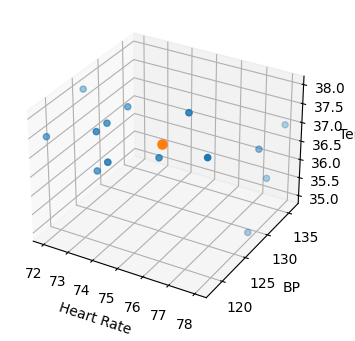

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("Heart Rate")
ax.set_ylabel("BP")
ax.set_zlabel("Temp")

ax.scatter(patients[:,0], patients[:,1], patients[:,2]) 
ax.scatter(avg_patient[0], avg_patient[1], avg_patient[2], s=44) 

plt.show()

<a id="broadcasting"></a>
<hr/>

### 7. Broadcasting


Broadcasting allows us to perform vectorized operations between two arrays even if their dimensions do not match by creating implicit multidimensional
Broadcasting on 
1. 1D array with a single number
2. 2D array with a single vector

##### 7.1 Broadcasting functions on 1D vector

![Broadcasting on 1D array](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211862&authkey=%21AEj6NJt9hcQ3N8Q&width=1000&height=236)

In [72]:
a = np.array([1,2,3])
a+1

array([2, 3, 4])


##### 7.2 Broadcasting functions on 2D vector

![Broadcasting on 1D array](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211863&authkey=%21AMZiqH9BTkTFLLU&width=1000&height=345)

In [73]:
X = np.array([[1,2,3],[4,5,6]])
a = np.array([1,2,3])
X+a

array([[2, 4, 6],
       [5, 7, 9]])

![Broadcast](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In [74]:
X = np.array([[1,2,3],[4,5,6]])
a = np.array([1,2,3])
X-a

array([[0, 0, 0],
       [3, 3, 3]])

**How to broadcast columnwise**

$$
\begin{bmatrix}
1& 2 & 3 \\
4 & 4 & 6
\end{bmatrix}
+
\begin{bmatrix}
1 \\
2
\end{bmatrix} ....

$$


In [77]:
X = np.array([[1,2,3],[4,5,6]])
a = np.array([1,2])
X+a

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

![Broadcast mismatch](https://numpy.org/doc/stable/_images/broadcasting_3.png)

In [79]:
X = np.array([[1,2,3],[4,5,6]])
a = np.array([1,2]).reshape(-1,1) #This is how we get broadcasting along axis 1
X+a

array([[2, 3, 4],
       [6, 7, 8]])

<a id="farthest-patient"></a>
<hr/>

### 8. Farthest patient from mean patient

1. This technique combines aggregation and broadcasting
2. Used for simple outlier detection using statistical techniques
3. Serves as basis for outlier detection in complex multivariate Gaussian distribution  

In [80]:
import pandas as pd

## Create patient data matrix
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})

df_patient.head()


,HR,BP,Temp
0,76,126,38.0
1,74,120,38.0
2,72,118,37.5
3,78,136,37.0


In [82]:
X = df_patient.to_numpy()
X

array([[ 76. , 126. ,  38. ],
       [ 74. , 120. ,  38. ],
       [ 72. , 118. ,  37.5],
       [ 78. , 136. ,  37. ]])

In [83]:
avg_patient = np.mean(X, axis=0)

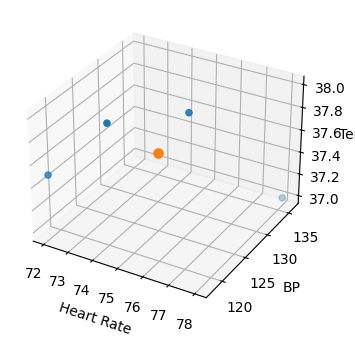

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("Heart Rate")
ax.set_ylabel("BP")
ax.set_zlabel("Temp")

ax.scatter(X[:,0], X[:,1], X[:,2]) 
ax.scatter(avg_patient[0], avg_patient[1], avg_patient[2], s=44) 

plt.show()

##### 8.1 Distance between any two patients

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

In [86]:
import math

patient1 = X[0]
patient2 = X[1]

# Very brute force
col_dist_summation = 0
for col in range(X.shape[1]): 
    col_dist_summation += (patient1[col] - patient2[col]) ** 2 # element wise subtraction and exponentiation

dist = math.sqrt(col_dist_summation)
print(f"distance between patient1 and 2 is {dist}")

distance between patient1 and 2 is 6.324555320336759


In [87]:
# A little brute force 

patient1 = X[0]
patient2 = X[1]

difference_vector = patient1 - patient2 # vectorized subtraction instead of elementwise subtraction

col_dist_summation = 0
for col in range(X.shape[1]): 
    col_dist_summation += difference_vector[col] ** 2 #still using elementwise exponentiation

dist = math.sqrt(col_dist_summation)
print(f"distance between patient1 and 2 is {dist}")

distance between patient1 and 2 is 6.324555320336759


In [89]:
# getting better

patient1 = X[0]
patient2 = X[1]

difference_vector = patient1 - patient2 #vectorized subtraction

print(f"difference vector is {difference_vector}")

dist = np.sqrt(np.sum(difference_vector**2)) # vectorized exponentitation instead of elementwise exponentiation

print(f"distance between patient1 and 2 is {dist}")

difference vector is [2. 6. 0.]
distance between patient1 and 2 is 6.324555320336759


In [92]:
# use built-in norm function

patient1 = X[0]
patient2 = X[1]

difference_vector = patient1 - patient2

dist = np.linalg.norm(difference_vector) #norm is the linear algebra term for vector magnitude
print(f"distance between patient1 and 2 is {dist}")

distance between patient1 and 2 is 6.324555320336759


In [93]:
np.linalg.norm(X[0] - X[1]) # bring it down to one line

6.324555320336759

**Distance of any given patient from mean**

In [94]:
patient = X[0] #choose first patient
mean_centrered_patient = patient - avg_patient

#distance of patient 1 from average patient
np.linalg.norm(mean_centrered_patient)

1.4630874888399532

**Why is mean subtraction called mean centering**

In [95]:
mean_patient = np.mean(X, axis=0)
mean_patient

array([ 75.   , 125.   ,  37.625])

##### 8.2 Finding the distance from mean patient vector for ALL patients: Traditional Approach

In [97]:
for i, patient in enumerate(X): #we can go over all patients one by one like this 
    print(patient)

[ 76. 126.  38.]
[ 74. 120.  38.]
[ 72.  118.   37.5]
[ 78. 136.  37.]


Given patient data set 
$ \begin{bmatrix}  76 & 126 & 38 \\ 74 & 120 & 38 \\ 72 & 118 & 37.5 \\ 78 & 136 & 37  \end{bmatrix} $
and average patient
$\begin{bmatrix} 75 \\ 125 \\ 37.25\end{bmatrix}$, 

we can calculate the distance of each patient from average patient as 

$\begin{bmatrix}  76 \\ 126 \\ 38 \end{bmatrix}  - \begin{bmatrix} 75 \\ 125 \\ 37.25\end{bmatrix}$

$\begin{bmatrix}  74 \\ 120 \\ 38 \end{bmatrix}  - \begin{bmatrix} 75 \\ 125 \\ 37.25\end{bmatrix}$,  

$\begin{bmatrix}  72 \\ 118 \\ 37.5 \end{bmatrix}  - \begin{bmatrix} 75 \\ 125 \\ 37.25\end{bmatrix}$ and 

$\begin{bmatrix}  78 \\ 136 \\ 37 \end{bmatrix}  - \begin{bmatrix} 75 \\ 125 \\ 37.25\end{bmatrix}$

In [100]:
avg_patient = np.mean(X, axis=0)
avg_patient

array([ 75.   , 125.   ,  37.625])

In [99]:
#Very much brute force because we are explictly coding for each patient vector

distances = np.empty(X.shape[0]) # 1D array to hold the distances of patient vector from mean vector 

patient0_mean_distance = np.linalg.norm(X[0] - avg_patient)
distances[0] = patient0_mean_distance

patient1_mean_distance = np.linalg.norm(X[1] - avg_patient)
distances[1] = patient1_mean_distance

patient2_mean_distance = np.linalg.norm(X[2] - avg_patient)
distances[2] = patient2_mean_distance

patient3_mean_distance = np.linalg.norm(X[3] - avg_patient)
distances[3] = patient3_mean_distance

distances

array([ 1.46308749,  5.11279033,  7.61679887, 11.41887144])

In [101]:
np.argmax(distances)

3

In [102]:
farthest_patient_index = np.argmax(distances)
print(f"farthest patient from mean is {farthest_patient_index} and the patient data  is {X[farthest_patient_index]}")

farthest patient from mean is 3 and the patient data  is [ 78. 136.  37.]


In [103]:
#put it all together and add a for loop
distances = np.empty(X.shape[0])

for i, patient in enumerate(X):
    patient_mean_distance = np.linalg.norm(patient - avg_patient)
    distances[i] = patient_mean_distance

farthest_patient_index = np.argmax(distances)
print(f"farthest patient from mean is {farthest_patient_index} and the patient data is {X[farthest_patient_index]}")

farthest patient from mean is 3 and the patient data is [ 78. 136.  37.]


##### 8.3 Finding the distance from mean patient vector for ALL patients: Vectorized Approach

In [104]:
farthest_patient_index = np.argmax(np.linalg.norm(X - avg_patient, axis=1))
print(f"farthest patient from mean is {farthest_patient_index} and the patient data is {X[farthest_patient_index]}")

farthest patient from mean is 3 and the patient data is [ 78. 136.  37.]


In [105]:
%%timeit

# traditional approach, removed the print statement, bcoz timeit runs several times and floods the output with print statements
distances = np.empty(X.shape[0])

for i, patient in enumerate(X):
    patient_mean_distance = np.linalg.norm(patient - avg_patient)
    distances[i] = patient_mean_distance

farthest_patient_index = np.argmax(distances)

68.7 µs ± 3.81 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [106]:
%%timeit
farthest_patient_index = np.argmax(np.linalg.norm(X - avg_patient, axis=1))

28.8 µs ± 634 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**Let us dissect what just happened**

$$ \begin{bmatrix}  76 & 126 & 38 \\ 74 & 120 & 38 \\ 72 & 118 & 37.5 \\ 78 & 136 & 37  \end{bmatrix}  - \begin{bmatrix} 75 & 125 & 37.25\end{bmatrix}$$

In [107]:
# we are subtracting a vector from matrix
# avg patient is broadcasted row wise 
X - avg_patient

array([[ 1.   ,  1.   ,  0.375],
       [-1.   , -5.   ,  0.375],
       [-3.   , -7.   , -0.125],
       [ 3.   , 11.   , -0.625]])

In [108]:
distance_vectors = np.linalg.norm(X - avg_patient, axis=1) #norm along column axis 
distance_vectors

array([ 1.46308749,  5.11279033,  7.61679887, 11.41887144])

<a id="scaler-tx"></a>
<hr/>

### 9. Feature transformation in sklearn

1. This extends the idea of subtracting an average patient from all patients a bit further. 
2. In the process, the features are transformed
3. Feature Transformation is an essential part of Feature Engineering as a pre cursor to applying ML algorithm 

In [109]:
## Create patient data matrix
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})

df_patient.head()

,HR,BP,Temp
0,76,126,38.0
1,74,120,38.0
2,72,118,37.5
3,78,136,37.0


In [110]:
df_patient.describe()

,HR,BP,Temp
count,4.000000,4.000000,4.000000
mean,75.000000,125.000000,37.625000
std,2.581989,8.082904,0.478714
min,72.000000,118.000000,37.000000
25%,73.500000,119.500000,37.375000
50%,75.000000,123.000000,37.750000
75%,76.500000,128.500000,38.000000
max,78.000000,136.000000,38.000000


$$ X\_scaled = z = \frac{x-\mu}{\sigma} $$

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_patient)
X_scaled

array([[ 0.4472136 ,  0.14285714,  0.90453403],
       [-0.4472136 , -0.71428571,  0.90453403],
       [-1.34164079, -1.        , -0.30151134],
       [ 1.34164079,  1.57142857, -1.50755672]])

In [116]:
X_scaled

array([[ 0.4472136 ,  0.14285714,  0.90453403],
       [-0.4472136 , -0.71428571,  0.90453403],
       [-1.34164079, -1.        , -0.30151134],
       [ 1.34164079,  1.57142857, -1.50755672]])

In [117]:
print(f"mean = {np.mean(X_scaled, axis=0)}")
print(f"standard deviation = {np.std(X_scaled, axis=0)}")

mean = [0.00000000e+00 0.00000000e+00 5.55111512e-17]
standard deviation = [1. 1. 1.]


1. StandardScaler transformation made the mean = 0 and standard deviation = 1
2. Standardization assumes the features follow Gaussian distribution and are mostly independent
3. Removes units from features
4. Converts into spherical gaussian distribution
3. Standardization is same as BatchNormalization in Keras/Tensorflow

Confusion: 
1. In sklearn and industry standard literature, normalization refers to another type of scaling 
2. This scales the data between 0 and 1
3. We will use both in EDA in future labs

$$ X\_normalized = \frac{X - X_{min}}{(X_{max} - X_{min})} $$



**Additional Reading**

Check these Scalers available in sklearn and when each is going to be used. One of the favorite questions in interviews

1. StandardScaler
2. MinMaxScaler
3. RobustScaler
4. MaxAbsScaler
5. LogTransformer
5. PowerTransformer



<a id="farthest-patients"></a>
<hr/>


### 10. Calculating farthest patients from each other

1. Slightly advanced topic - Only for AIML M.E.
2. Will be covered in ALA lab using multiple vectorization techniques
3. Many more vectorization techniques

NOTE: If you are not thorough with this Numpy tutorial, all upcoming vectorization will sound alien

<a id="farthest-patients"></a>
<hr/>
